# Sample Python code to analyze NASA-NEX data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
# Data already downloaded by
# aws s3 cp s3://nasanex/NEX-GDDP/BCSD/rcp85/day/atmos/tasmax/r1i1p1/v1.0/tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc ./
ds = xr.open_dataset("./tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2100-01-01T12:00:00 2100-01-02T12:00:00 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    parent_experiment:              historical
    parent_experiment_id:           historical
    parent_experiment_rip:          r1i1p1
    Conventions:                    CF-1.4
    institution:                    NASA Earth Exchange, NASA Ames Research C...
    institute_id:                   NASA-Ames
    realm:                          atmos
    modeling_realm:                 atmos
    version:                        1.0
    downscalingModel:               BCSD
    experiment_id:                  rcp85
    frequency:                      day
    realization:                    1
    initialization_method

In [3]:
ds['tasmax']

<xarray.DataArray 'tasmax' (time: 365, lat: 720, lon: 1440)>
[378432000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2100-01-01T12:00:00 2100-01-02T12:00:00 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Attributes:
    time:              32850.5
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             K
    original_name:     tasmax
    cell_methods:      time: maximum (interval: 1 day)
    cell_measures:     area: areacella
    history:           2010-10-25T09:20:20Z altered by CMOR: Treated scalar d...
    coordinates:       height
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

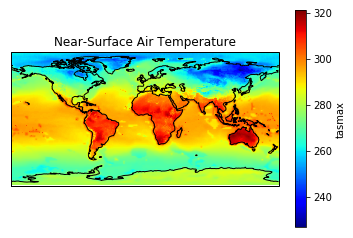

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds['tasmax'][0].plot(cmap='jet')
ax.coastlines()
plt.title('Near-Surface Air Temperature');

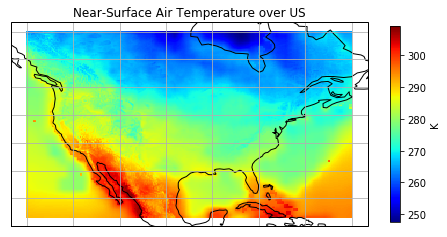

In [5]:
plt.figure(figsize=[8, 6])
ax = plt.axes(projection=ccrs.PlateCarree())
(ds['tasmax'][0].
 sel(lon=slice(230, 300), lat=slice(20, 60)).
 plot(cmap='jet', cbar_kwargs={'shrink': 0.6, 'label': 'K'})
)
ax.coastlines()
ax.gridlines()
plt.title('Near-Surface Air Temperature over US');